### Introduction

### (Computational) kernel

Jupyter as a server generates the interactive web interface that you are seeing (and using) now. To run the code, the server maintains a running instance of Python, what is called a _computational kernel_. Think of it as an open terminal window with the interactive Python open: each time you _evaluate_ a cell, the code is run on that "kernel", and the output is displayed below the input cell. Try to run the cell below:

In [1]:
a = 3+2
print(a)

5


Then you can use the variable `a` again in your next executions:

In [2]:
print(a)

5


Check the `Kernel` menu on top of the page for options on controlling the underlying Python execution. For example, `Restart & Run All` terminates the current kernel, launches a new fresh one, then executes all (code) cells in the notebook in order. The `Interrupt` command is also useful if a bug gets the execution stuck.

# 1. Fundamentals

#### 1.1 **[1pt]** Write a sentence that correctly employs the words *problem*, *solution*, *model* and *parameters set*.

The problem of machine learning is specifying model that takes a parameters set as input and return a solution (a function). This solution is then incorporated to make prediction on new data.

#### 1.2 **[1pt]** Write the equation of a linear model. You should use $\LaTeX$ formatting, just wrap the equation in between dollar signs (e.g. `$\LaTeX$`).

$y=m*x +q$ with $x_i, y_i \in R$

#### 1.3 **[1pt]** When is a system of equations *overdetermined*?

A system of equations overdetermined when it captures the inherent errors, noises too closely

#### 1.4 **[1pt]** Describe with your own words (i.e. English) what is a *Training Dataset*.

Training data are observations which we use to train, teach our method how to fit the model and to estimate the unknown function $\hat{y}=h(x)$

#### 1.5 **[1pt]** List the other two (main) learning paradigms beside *unsupervised learning*.

Supervised learning, reinforeced learning

#### 1.6 **[1pt]** Which word describes when the model I use is too complex to capture the underlying simplicity of the data? 

Overfitting

# 2. Error, loss and risk

Understanding the concept of loss and risk is fundamental to comprehending the general idea of an "error". The whole ML is founded on the basis of recognizing error and minimizing it. These questions go into a separate section to highlight how important it is that you understand what is going on here.

#### 2.1 **[3pt]** About the *Loss Function*: why $L(\hat y, y) = 0 \;\;\text{if}\;\; \hat y = y, \;\;\forall y \in Y$?

When $\hat{y} = y$, we say $\hat{y}$ is a perfect estimate of the target $y$. Loss function indicates the difference between the prediction and the label, the severity of estimate $\hat{y}$ instead of $y$ and a zero loss means a perfect accuracy of prediction. 

If you want to implement the *Empirical Risk* in Python, you need to understand its mathematical form. Let's say that the *Loss* is a simple difference between prediction and target:

#### 2.2 **[3pt]** What does $\hat{R}(h) = \sum_{i=1}^n L(h(x_i), y_i),\;\forall (x_i, y_i) \in D$ mean?
In English here, though you will get to code it in one of the next questions.

It's empirical risk computed by summing up all absolute losses over the dataset

# 3. Simplest learning

Enough concepts, let's have some fun. I hope you are familiar with Python -- if not yet, you should become so by the end of the course. If your confidence is low you should start a discussion on Moodle, so that you can all help each other (and help us help you).

Do you know about `lambda` functions in Python? You can write a method that returns a function. The function can be used as if it was a method defined with `def`. Only be careful about 1. `lambda`s always (implicitly) `return` the result of their computation, and 2. you cannot write multiline lambdas (go ask Guido van Rossum why). Still, using them is easier than it sounds:

In [ ]:
def add_n(n): 
    return lambda x: n+x

In [8]:
add_3 = add_n(3)
add_3(5)

8

Ok how about we create and plot some artificial data? 

In [15]:
# These lines are required for our plotting function below
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# While this is the library for numerical manipulations
import numpy as np

# This is just some styling for the plotting library
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")

# Let's create the data from a function you should be acquainted with by now
# (do you know lambdas yet? They are basically short, unnamed methods)
trg_fn = lambda x: 2*x - 1 
# Of course we want the data to be a bit noisy
some_noise = lambda: np.random.normal(0,3)
# Let's generate it using numpy's linear space and a python list comprehension,
# just to make sure you know these too
data = [[x, trg_fn(x) + some_noise()] for x in np.linspace(-10, 10, 50)]

# You will find commonly data treated by axis/column rather than coordinate pairs.
# This aggregates data series belonging to the same dimension (feature)
transpose = lambda lst: list(map(list, zip(*lst)))
data_x, data_y = transpose(data)

# And here's a canned plotting function that you are free to use (for now...)
def plot_data_and_model(model=None, text=None):
    ret = sns.scatterplot(x=data_x, y=data_y) # hard-coded data plotting because we can
    if model is not None:
        sns.lineplot(x=data_x, y=[model(x) for x in data_x], color='darkred')
    if text is not None:
        plt.title(text)
    return ret

Here is what the data you just generated looks like:

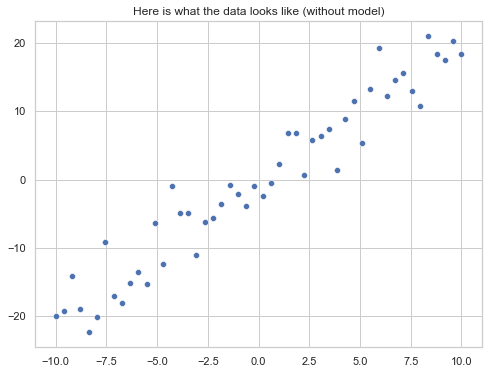

In [11]:
plot_data_and_model(text="Here is what the data looks like (without model)");

And here is what it looks like if you cheat and plot the underlying function (ideally your final, learned model should look similar)

<AxesSubplot:title={'center':'Data with generating function'}>

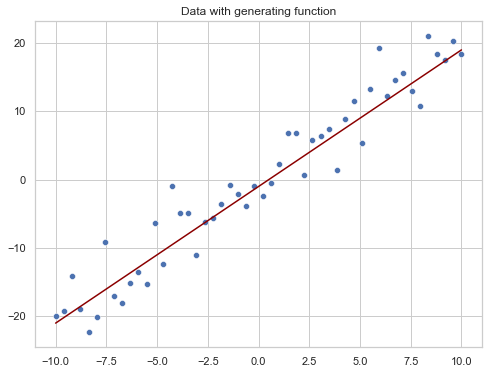

In [12]:
plot_data_and_model(trg_fn, text="Data with generating function")

#### 3.1 **[2pt]** Write your linear model as a method that takes `m` and `q` as input, and return a linear function of the form `mx + q`.

In [1]:
def linear_model(m,q):
    return lambda x: m*x+q
    

In [9]:
model_example=linear_model(8,-1)

#### 3.2 **[2pt]** Write your loss as a method that takes an `x` and a target and returns the absolute value of their difference
(think: what happens if we forget the absolute value?)

In [10]:
def loss(x,target,model):
    y=model(x)
    return abs(y-target)

In [11]:
loss(1,8,model_example)

1

#### 3.3 **[2pt]** Write your risk as a method (or lambda) that takes a model as input, and returns the total loss over our (hard-coded) data

In [12]:
def risk(model):
    risk=0
    for i in range(len(data_x)):
        risk=+loss(data_x[i],data_y[i],model)
    return risk

In [16]:
risk(model_example)

60.29346471843571

Here is an example of a loop that generates random numbers and maintains a *minimum*.  
(think: will you need to minimize or maximize the risk of your model?)

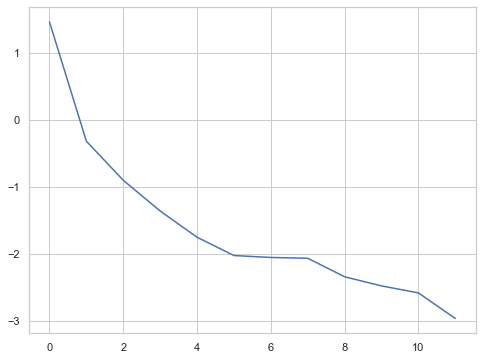

In [35]:
min_guess = np.Infinity # higher than highest possible

best_guesses = []
for _ in range(100):
    guess = np.random.uniform(-3,3)
    if guess < min_guess:
        min_guess = guess
        best_guesses.append(min_guess)

sns.lineplot(x=range(len(best_guesses)), y=best_guesses);

TIP: it is always useful to visualize how the loss decreases over time, especially for debugging purposes. You can do the same next for your errors/losses.

#### 3.4 **[6pt]** Randomly guess a model's parameters 1000 times. Then plot it using the call below.
```python
plot_data_and_model(lin_model(m, q), text=f"m={round(m,2)}    q={round(q,2)}")        
```
Make sure you understand how string interpolation works when using the format `f"hello w{2+1-3}rld"`.  
You will need to modify the loop above in order to maintain both a best guess for your model and its corresponding best risk/error.

In [17]:
min_risk = np.Infinity
best_guesses = []
best_parameters = []
best_risks = []

for _ in range(1000):
    guess_m = np.random.uniform(-10,10)
    guess_q = np.random.uniform(-10,10)
    model = linear_model(guess_m,guess_q)
    guess_risk = risk(model)
    if guess_risk < min_risk:
        min_risk = guess_risk
        best_guesses.append(model)
        best_risks.append(min_risk)
        best_parameters.append([guess_m,guess_q])
m = best_parameters[-1][0]
q = best_parameters[-1][1]

<AxesSubplot:title={'center':'m=1.89    q=-0.21'}>

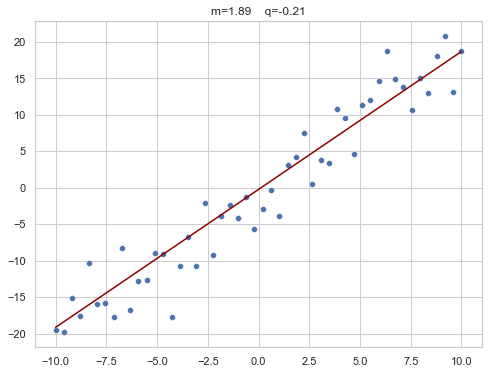

In [18]:
plot_data_and_model(best_guesses[-1],text=f"m={round(m,2)}    q={round(q,2)}") 

<AxesSubplot:>

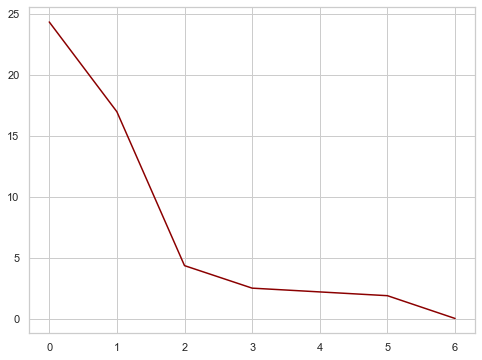

In [19]:
sns.lineplot(x=range(len(best_risks)), y=best_risks, color='darkred')

In [20]:
best_parameters[-1]

[1.8909653621581306, -0.20835251407034683]